<a href="https://colab.research.google.com/github/HironoriTakeda/ant-colony/blob/main/sample_241105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

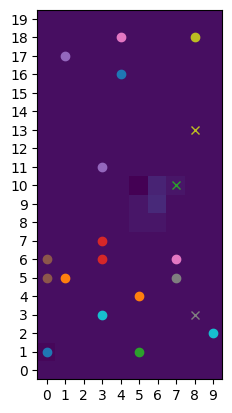

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import random

# field の初期設定 ###########################
NX = 10
NY = 20

# fieldの状態
HOME = -1 # 巣
FEED = -2 # 餌場
ROAD = 0 # 道

# HOMEとFEEDの位置
HOME_POS = [0, 1]
FEED_POS = [int(NX/2), int(NY/2)]

# フェロモンに関するパラメータ
A_SEC = 10 # 1ステップでのアリのフェロモン放出量
A_DEC = 1 # アリのフェロモン放出量の減少速度 (A_DEC * ant_cnt)
F_DEC = 1 # 1ステップでのフィールドのフェロモン消散量

# フィールドの状態
field  = np.arange(NX*NY).reshape(NY,NX) # NX * NYの場
for i in range(NY):
  a = 10
  for j in range(NX):
    field[i][j] = ROAD

field[HOME_POS[1]][HOME_POS[0]] = HOME
field[FEED_POS[1]][FEED_POS[0]] = FEED

# アリの初期設定 ###############################
NANT = 20 # アリの数

# アリの状態
GO = 0 # 餌に向かう
RETURN = 1 # 巣に向かう

ant_pos = np.zeros(2*NANT).reshape([NANT,2]) # アリの位置（ant_pos[アリ番号][0(x) or 1(y)]）
ant_state = np.zeros(NANT) # アリの状態（ant_pos[アリ番号]）

for i in range(NANT):
  ant_state[i] = GO
  ant_pos[i][0] = random.randint(0, NX-1)
  ant_pos[i][1] = random.randint(0, NY-1)

ant_cnt = np.zeros(NANT)

# 描画設定 ######################################
fig, ax = plt.subplots()

# 時間を更新する関数 ##############################
def update(i):

  plt.cla()

  # フェロモンの消散
  for k in range(NY):
    for j in range(NX):
      if field[k][j] >= 0:
        field[k][j] = max(field[k][j]-F_DEC, 0)

  # アリの行動
  for j in range(NANT):

    # 上下左右のランダムな方向に動く
    tmp = random.randint(0,3)
    ant_pos[j][tmp%2] += int(2*(int(tmp/2)-0.5))

    # フィールド外に出た場合は元の位置に戻す
    if ant_pos[j][0]<0:
      ant_pos[j][0] += 1
    if ant_pos[j][0]>=NX:
      ant_pos[j][0] -= 1
    if ant_pos[j][1]<0:
      ant_pos[j][1] += 1
    if ant_pos[j][1]>=NY:
      ant_pos[j][1] -= 1

    # FEEDに位置する場合はアリの状態（ant_state）をRETURNにする
    if ant_pos[j][0] == FEED_POS[0] and ant_pos[j][1] == FEED_POS[1]:
      ant_state[j] = RETURN
    # HOMEに位置する場合はアリの状態（ant_state）をGOにする
    if ant_pos[j][0] == HOME_POS[0] and ant_pos[j][1] == HOME_POS[1]:
      ant_state[j] = GO

    # FEEDに到達してから，何ステップ経過したか（ant_cnt）
    if ant_state[j] == RETURN:
      ant_cnt[j] += 1
    if ant_state[j] == GO:
      ant_cnt[j] = 0

    # フェロモンの放出
    # ant_cnt に応じて放出するフェロモン量が減少
    x = int(ant_pos[j][0])
    y = int(ant_pos[j][1])
    if ant_state[j] == RETURN and field[y][x]>=0:
      tmp = A_SEC - A_DEC * ant_cnt[j]
      if tmp < 0:
        tmp = 0
      field[y][x] += tmp

  # 描画
  for j in range(NANT):
    if ant_state[j] == GO:
      ax.plot(ant_pos[j][0]+0.5, ant_pos[j][1]+0.5, 'o')
    if ant_state[j] == RETURN:
      ax.plot(ant_pos[j][0]+0.5, ant_pos[j][1]+0.5, 'x')

  c = ax.pcolor(field, vmin=-2, vmax=50)

  ax.set_xlim(0, NX)
  ax.set_ylim(0, NY)
  ax.set_aspect('equal')
  ax.set_xticks(np.arange(NX) + 0.5)
  ax.set_xticklabels(np.arange(NX))
  ax.set_yticks(np.arange(NY) + 0.5)
  ax.set_yticklabels(np.arange(NY))

  # 関数(update)の終了

anime = FuncAnimation(fig, update, frames = 100, interval=200)
anime.save('anime.gif')
# anime



